In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rgb2gray(image):
    return 0.2989 * image[:, :, 0] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 2]

def convolve(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output = np.zeros_like(image)
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant') 
    
    # Performing convolution leaving the padding
    for i in range(1, img_height + 1):
        for j in range(1, img_width + 1):
            region = padded_image[i-1:i+2, j-1:j+2]  
            output[i-1, j-1] = np.sum(region * kernel)  
    return output


def sobel_edge_detection(image):
    if len(image.shape) == 3:
        image = rgb2gray(image)
    
    # Sobel kernel
    ## sobel kernel for horizontal edge
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    ## sobel kernel for vertical edge
    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])
    
    grad_x = convolve(image, sobel_x)
    grad_y = convolve(image, sobel_y)
    
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    return gradient_magnitude

image = plt.imread('one.jpeg')
edges = sobel_edge_detection(image)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Edges (Sobel)')
axes[1].axis('off') 
plt.tight_layout()
plt.show()





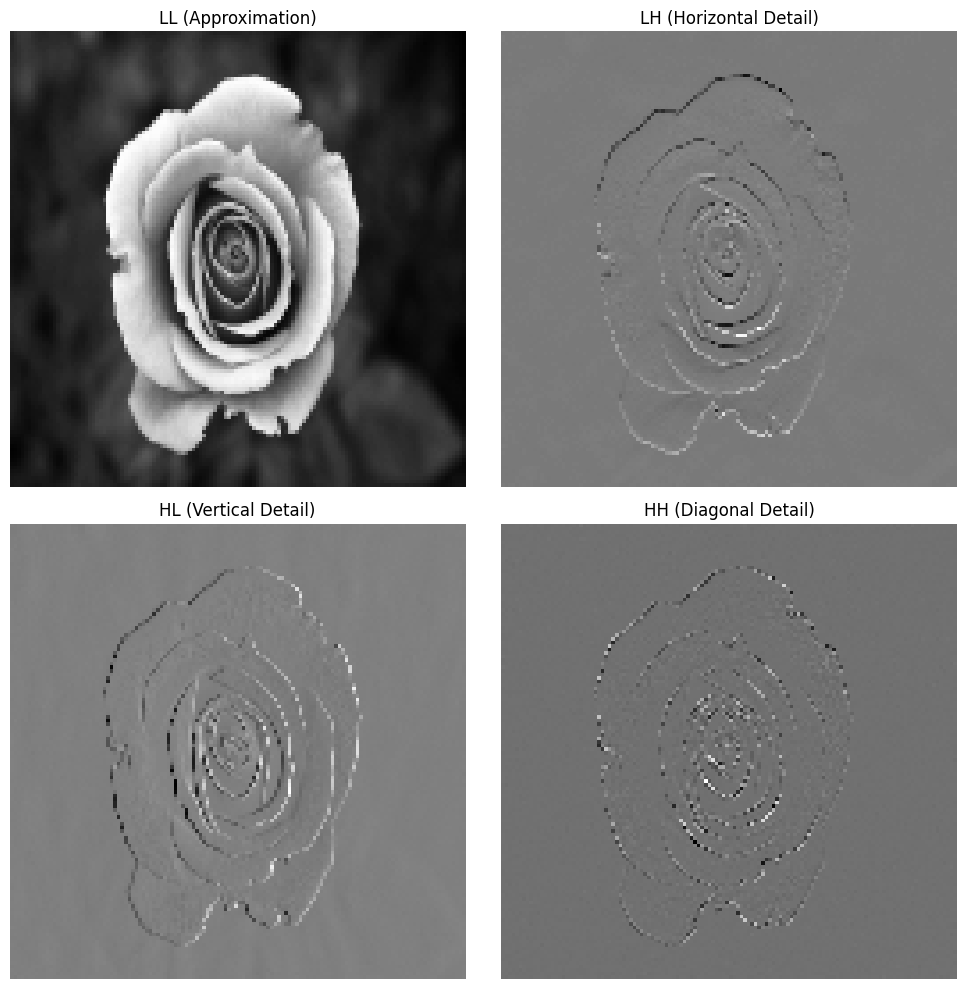

In [1]:
import numpy as np
import cv2
import pywt
import matplotlib.pyplot as plt

def wavelet_transform(image_path):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    image = cv2.resize(image, (256, 256))  

    coeffs2 = pywt.wavedec2(image, 'haar', level=1)  
    
    LL, (LH, HL, HH) = coeffs2
    
    return LL, LH, HL, HH

def plot_subbands(LL, LH, HL, HH):
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.title('LL (Approximation)')
    plt.imshow(LL, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('LH (Horizontal Detail)')
    plt.imshow(LH, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('HL (Vertical Detail)')
    plt.imshow(HL, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('HH (Diagonal Detail)')
    plt.imshow(HH, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

image_path = r'rose.jpg'  

LL, LH, HL, HH = wavelet_transform(image_path)

plot_subbands(LL, LH, HL, HH)
